In [54]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import time

In [55]:
df = pd.read_csv('fake_job_postings.csv')

In [56]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
job_id                 17880 non-null int64
title                  17880 non-null object
location               17534 non-null object
department             6333 non-null object
salary_range           2868 non-null object
company_profile        14572 non-null object
description            17879 non-null object
requirements           15185 non-null object
benefits               10670 non-null object
telecommuting          17880 non-null int64
has_company_logo       17880 non-null int64
has_questions          17880 non-null int64
employment_type        14409 non-null object
required_experience    10830 non-null object
required_education     9775 non-null object
industry               12977 non-null object
function               11425 non-null object
fraudulent             17880 non-null int64
dtypes: int64(5), object(13)
memory usage: 2.5+ MB


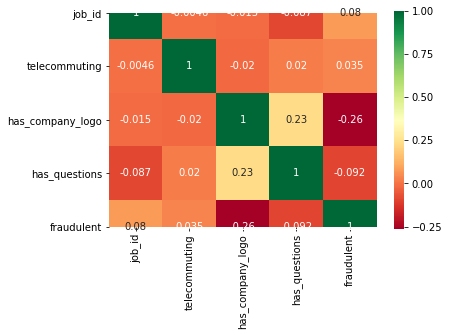

In [58]:
sns.heatmap(df.corr(),square=True,cmap='RdYlGn',annot=True)

In [59]:
# Missing values
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [60]:
# Deliting column "salary_range", because there is no 84% information of all observation.
df.drop(['salary_range'], axis='columns', inplace=True)

In [61]:
# Deliting column "job_id", because it doen`t help in analysis
df.drop(['job_id'], axis ='columns',inplace= True)

In [62]:
# Fill missing values
df.fillna(" ",inplace = True)

In [63]:
# Number of  real and fake ads ("0" - real, "1" -fake)
df["fraudulent"].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

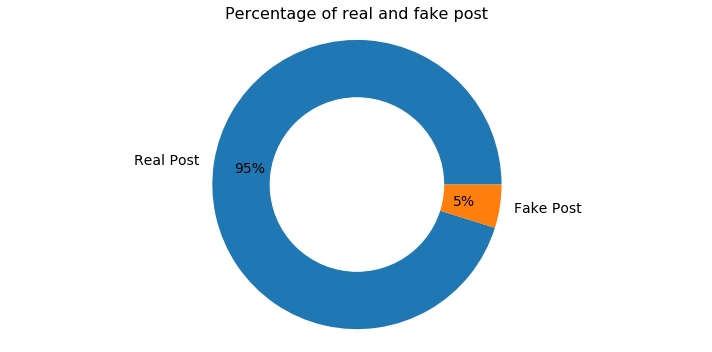

In [64]:
# Percentage of  real and fake job
fraudulent_plot = df["fraudulent"].value_counts().plot(kind='pie', figsize=(10,5), autopct="%.0f%%", pctdistance = 0.75, textprops={'fontsize': 14},labels=['Real Post', 'Fake Post'])
fraudulent_plot.set_title('Percentage of real and fake post', fontsize=16)
fraudulent_plot.set_ylabel('')
circle = plt.Circle((0,0), 0.6, color='white')
fraudulent_plot.add_artist(circle)
plt.axis('equal')
plt.tight_layout()

In [65]:
# Сombine words from all columns into 2 list (fake/real words)
df['text'] = df['title'] + ' ' + df['location'] + ' ' + df['department'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits'] + ' ' + df['employment_type'] + ' ' + df['required_education'] + ' ' + df['industry'] + ' ' + df['function']


fake_words = df[df.fraudulent == 1].text
real_words = df[df.fraudulent == 0].text

In [66]:
df_text= df[['text', 'fraudulent']]
df_text

,text,fraudulent
0,"Marketing Intern US, NY, New York Marketing We...",0
1,"Customer Service - Cloud Video Production NZ, ...",0
2,"Commissioning Machinery Assistant (CMA) US, IA...",0
3,"Account Executive - Washington DC US, DC, Wash...",0
4,"Bill Review Manager US, FL, Fort Worth SpotS...",0
...,...,...
17875,"Account Director - Distribution CA, ON, Toron...",0
17876,"Payroll Accountant US, PA, Philadelphia Accoun...",0
17877,Project Cost Control Staff Engineer - Cost Con...,0
17878,"Graphic Designer NG, LA, Lagos Nemsia Stud...",0


In [67]:
# Number of fake words
str_fakewords = ''
for i in fake_words:
    for j in i:
        str_fakewords += j
len(str_fakewords)   

1856538

In [68]:
# Number of real words
str_realwords = ''
for i in real_words:
    for j in i:
        str_realwords += j
len(str_realwords)  

47087362

Text(0.5, 1.0, 'Fake words')

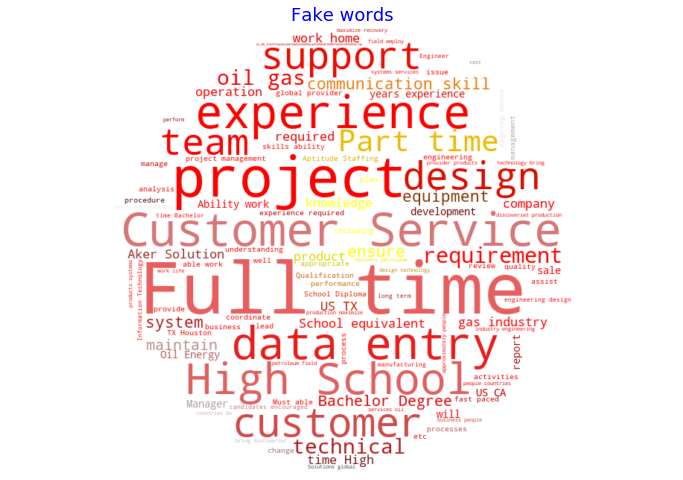

In [70]:
from PIL import Image, ImageDraw
from os import path, getcwd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap

stopwords = set(STOPWORDS)

# Fake words vizualization
image_mask  = np.array(Image.open('stop.png'))
wordcloud2 = WordCloud(background_color="white", stopwords=stopwords, mask=image_mask, max_words = 200, 
                       contour_color='').generate(str_fakewords)   


image_colors = ImageColorGenerator(image_mask)
plt.figure(figsize=[12,12])
plt.imshow(wordcloud2.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.title('Fake words', fontsize=18, color ='blue')

Text(0.5, 1.0, 'Real words')

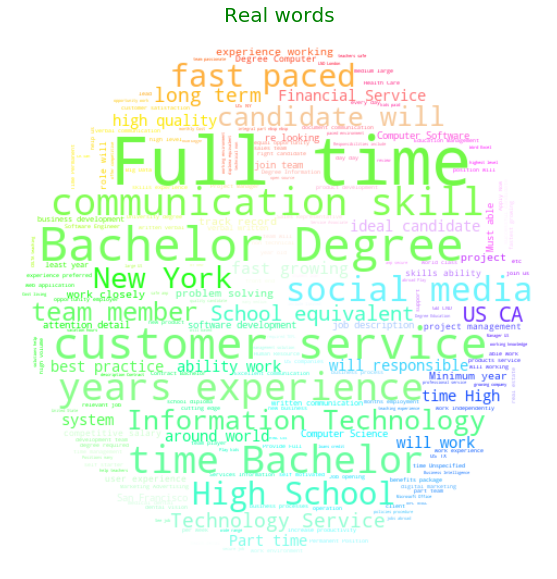

In [71]:
# Real words vizualization

stopwords = set(STOPWORDS)
image_mask2  = np.array(Image.open('circle.png'))
wordcloud_ = WordCloud(background_color="white", stopwords=stopwords, mask=image_mask2, max_words = 200, 
                       contour_color='').generate(str_realwords)   

image_colors = ImageColorGenerator(image_mask2)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.title('Real words', fontsize=20, color ='green')

In [72]:
# Employment type: "0" - real, "1" -fake

df.groupby('fraudulent').agg({'employment_type': 'value_counts'})

# RESULT: As can be seen from the analysis, real employers offer full-time jobs, 
# and fake employers offer the most part-time work 


employment_type
fraudulent employment_type                 
0          Full-time                  11130
                                       3230
           Contract                    1480
           Part-time                    723
           Temporary                    239
           Other                        212
1          Full-time                    490
                                        241
           Part-time                     74
           Contract                      44
           Other                         15
           Temporary                      2

In [73]:
# Required_education: "0" - real, "1" -fake

df.groupby('fraudulent').agg({'required_education': 'value_counts'})
#  RESULT: different requirements for the level of education. Real employers more often want
# bachelors or masters (highly skilled employees)


required_education
fraudulent required_education                                   
0                                                           7654
           Bachelor's Degree                                5045
           High School or equivalent                        1910
           Unspecified                                      1336
           Master's Degree                                   385
           Associate Degree                                  268
           Certification                                     151
           Some College Coursework Completed                  99
           Professional                                       70
           Vocational                                         49
           Doctorate                                          25
           Vocational - HS Diploma                             9
           Some High School Coursework                         7
           Vocational - Degree                                 6
1                                                            451
           High School or equivalent                         170
           Bachelor's Degree                                 100
           Unspecified                                        61
           Master's Degree                                    31
           Some High School Coursework                        20
           Certification                                      19
           Associate Degree                                    6
           Professional                                        4
           Some College Coursework Completed                   3
           Doctorate                                           1

In [20]:
# Required experience: "0" - real, "1" -fake
df.groupby('fraudulent').agg({'required_experience': 'value_counts'})
#  RESULT: There is no clear difference in ads in this section.


required_experience
fraudulent required_experience                     
0                                              6615
           Mid-Senior level                    3696
           Entry level                         2518
           Associate                           2255
           Not Applicable                      1056
           Director                             372
           Internship                           371
           Executive                            131
1                                               435
           Entry level                          179
           Mid-Senior level                     113
           Not Applicable                        60
           Associate                             42
           Director                              17
           Executive                             10
           Internship                            10

In [75]:
df_text_and_fraudulent = df[['text', 'fraudulent']]

# to lower case the text, remove punctuations from the column of the dataframe
df_text_and_fraudulent.loc[:, 'text'] = df_text_and_fraudulent['text'].str.lower().str.replace('[^\w\s]','')
df_text_and_fraudulent

,text,fraudulent
0,marketing intern us ny new york marketing were...,0
1,customer service cloud video production nz a...,0
2,commissioning machinery assistant cma us ia we...,0
3,account executive washington dc us dc washing...,0
4,bill review manager us fl fort worth spotsou...,0
...,...,...
17875,account director distribution ca on toronto ...,0
17876,payroll accountant us pa philadelphia accounti...,0
17877,project cost control staff engineer cost cont...,0
17878,graphic designer ng la lagos nemsia studio...,0


In [76]:
# PART 2. Naive Bayes classifier
X_train,X_test,y_train,y_test = train_test_split(df_text_and_fraudulent["text"],df_text_and_fraudulent["fraudulent"], test_size = 0.2, random_state = 10)

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english')
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [26]:
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)
type(X_test_df)

scipy.sparse.csr.csr_matrix

In [78]:
#Create the dictionary
prediction_ = dict()

#train the model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [79]:
prediction_["naive_bayes"] = model.predict(X_test_df)

In [80]:
# Comparing: "0" - real, "1" -fake
print(pd.DataFrame({'Actual': y_test, 'Predicted': prediction_["naive_bayes"]}))

       Actual  Predicted
6635        1          1
4049        0          0
7062        0          0
1318        0          0
7972        0          0
...       ...        ...
5732        0          0
4111        0          0
13440       0          0
3684        0          0
11494       0          0

[3576 rows x 2 columns]


In [81]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score_naive_bayes = accuracy_score(y_test,prediction_["naive_bayes"])
print("Accuracy score is ", accuracy_score_naive_bayes)

Accuracy score is  0.973434004474273


In [82]:
# Methods for estimating model parameters

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction_['naive_bayes']))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction_['naive_bayes']))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction_['naive_bayes'])))

# Ideal MSE is close to 0, in this case Mean Squared Error: 0.026565995525727068. It`s good result.

Mean Absolute Error: 0.026565995525727068
Mean Squared Error: 0.026565995525727068
Root Mean Squared Error: 0.16299078356068808


In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_['naive_bayes'], target_names = ["Real ads", "Fake ads"]))

# RESULT: 
# Result doesn't seems well because of unbalanced dataset. 

# We have a binary target variable (2 classes) — that’s 1 when the transaction is fraudulent and 0 when it isn’t — it’s normal 
# for less than 5% of the observations to belong to class 1 (fraud) than to class 0 (not fraud). 
# In this case, we have a highly unbalanced dataset.

# As we saw above, accuracy is not the best metric to use when evaluating imbalanced datasets as it can be very misleading. 

# I need to change the algorithm.

              precision    recall  f1-score   support

    Real ads       0.98      1.00      0.99      3416
    Fake ads       0.89      0.46      0.61       160

    accuracy                           0.97      3576
   macro avg       0.93      0.73      0.80      3576
weighted avg       0.97      0.97      0.97      3576



In [89]:
# PART 3. Random Forest
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [90]:
text_clf = Pipeline([
                     ('tfidf', TfidfVectorizer()),
                     ('clf', RandomForestClassifier())
                     ])

In [91]:
#train the model
text_clf.fit(X_train,y_train)

/Users/olga/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [92]:
prediction_["RandomForest"] = text_clf.predict(X_test)

# Comparing: "0" - real, "1" -fake
print(pd.DataFrame({'Actual': y_test, 'Predicted': prediction_["RandomForest"]}))

       Actual  Predicted
6635        1          1
4049        0          0
7062        0          0
1318        0          0
7972        0          0
...       ...        ...
5732        0          0
4111        0          0
13440       0          0
3684        0          0
11494       0          0

[3576 rows x 2 columns]


In [93]:
# Methods for estimating model parameters

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction_['RandomForest']))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction_['RandomForest']))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction_['RandomForest'])))

# Ideal MSE is close to 0, in this case Mean Squared Error: 0.01873601789709172. It`s good result.

Mean Absolute Error: 0.017897091722595078
Mean Squared Error: 0.017897091722595078
Root Mean Squared Error: 0.13378001241813023


In [94]:
# Accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score_RandomForest = accuracy_score(y_test,prediction_["RandomForest"])

print("Accuracy score is ", accuracy_score_RandomForest)

# RESULT: Model Random Forest has more accuracy (0.9821029082774049), that naive bayes classifier (0.973434004474273)

Accuracy score is  0.9821029082774049


In [95]:
# Checking random text accuracy
res = text_clf.predict(['We are looking for senior software developer. No previous experience. No education is required. High salary.'])
print(res)
# Result doesn't seems true because of unbalanced dataset. 

[0]


In [96]:
print(classification_report(y_test, prediction_["RandomForest"], target_names = ["Real ads", "Fake ads"]))

# RESULT is better that naive bayes classifier.

              precision    recall  f1-score   support

    Real ads       0.98      1.00      0.99      3416
    Fake ads       1.00      0.60      0.75       160

    accuracy                           0.98      3576
   macro avg       0.99      0.80      0.87      3576
weighted avg       0.98      0.98      0.98      3576



In [97]:
# PART 4. Logistic regression
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [98]:
vectorizer = TfidfVectorizer("english")
message_mat = vectorizer.fit_transform(df_text_and_fraudulent.text)
message_mat

<17880x166972 sparse matrix of type '<class 'numpy.float64'>'
	with 3805485 stored elements in Compressed Sparse Row format>

In [99]:
X_train,X_test,y_train,y_test  = train_test_split(message_mat, df_text_and_fraudulent["fraudulent"], test_size=0.3, random_state=20)          


In [100]:
#train the model
classifier = LogisticRegression(solver='liblinear', penalty='l1')
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
prediction_["LogisticRegression"] = classifier.predict(X_test)

In [102]:
# Comparing: "0" - real, "1" -fake
print(pd.DataFrame({'Actual': y_test, 'Predicted': prediction_["LogisticRegression"]}))

       Actual  Predicted
1835        0          0
1187        0          0
12107       0          0
11122       0          0
13007       0          0
...       ...        ...
241         0          0
1336        0          0
1366        0          0
1810        0          0
17065       0          0

[5364 rows x 2 columns]


In [50]:
# Methods for estimating model parameters

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction_['LogisticRegression']))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction_['LogisticRegression']))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction_['LogisticRegression'])))

# Ideal MSE is close to 0, in this case Mean Squared Error: 0.0296420581655481. It`s good result, but worse that Ramdom Forest and 
# Naive Bayes models.

Mean Absolute Error: 0.0296420581655481
Mean Squared Error: 0.0296420581655481
Root Mean Squared Error: 0.1721686910142146


In [103]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score_LogisticRegression = accuracy_score(y_test,prediction_["LogisticRegression"]) 
print("Accuracy score is ", accuracy_score_LogisticRegression )

Accuracy score is  0.9703579418344519


In [104]:
print(classification_report(y_test, prediction_["LogisticRegression"], target_names = ["Real ads", "Fake ads"]))
# THE RESULT is worse that Random Forest.

              precision    recall  f1-score   support

    Real ads       0.97      1.00      0.98      5088
    Fake ads       0.96      0.44      0.61       276

    accuracy                           0.97      5364
   macro avg       0.97      0.72      0.80      5364
weighted avg       0.97      0.97      0.97      5364



In [53]:
# Comparing 3 models: 

print("Naive Bayes classifier: accuracy score is ", accuracy_score_naive_bayes)
print("Random Forest: accuracy score is ", accuracy_score_RandomForest)
print("Logistic Regression: accuracy score is ", accuracy_score_LogisticRegression)

# RESULT: According classification reports and  accuracy score the best model is Random Forest with accuracy score 0.9821029082774049.

Naive Bayes classifier: accuracy score is  0.973434004474273
Random Forest: accuracy score is  0.9821029082774049
Logistic Regression: accuracy score is  0.9703579418344519
